# Analyse et Exploration des Images Radiographiques Pulmonaires

Ce notebook réalise l'exploration et l'analyse initiales du jeu de données de radiographies pulmonaires pour la détection de pneumonie. Nous allons :

1. Explorer la structure et l'organisation du jeu de données
2. Compter le nombre d'images dans chaque catégorie
3. Analyser les propriétés des images (dimensions, formats)
4. Visualiser des exemples d'images de chaque classe

In [13]:
import os
# Interface système d'exploitation: utilisé pour naviguer dans les répertoires, joindre les chemins d'accès et accéder aux fichiers du dataset

import numpy as np
# Python Numérique: gère les tableaux de données de pixels et effectue des opérations mathématiques sur les données d'image

from PIL import Image
# Bibliothèque d'imagerie Python: ouvre et traite des fichiers image de différents formats (JPEG, PNG, etc.)

import pandas as pd
# Bibliothèque d'analyse de données: crée et manipule des DataFrames pour organiser et analyser les propriétés des images

import random
# Génération de nombres aléatoires: sélectionne des échantillons aléatoires d'images pour une analyse équilibrée

import time 

import matplotlib.pyplot as plt  
# Création de graphiques et visualisation de données



# Première Cellule : Analyse d'une Image

1. Définir chemin des images normales
2. Lister les fichiers
3. Afficher 5 premiers noms de fichiers
4. Charger la première image
5. Afficher infos de base (format, dimensions)
6. Convertir en tableau numpy
7. Calculer statistiques des pixels (min, max, moyenne, écart-type)

In [14]:
image_path = os.path.join('chest_Xray', 'train', 'NORMAL')

files = os.listdir(image_path)

print("First 5 files in the NORMAL category:")
for i, filename in enumerate(files[:5]):
    print(f"{i+1}. {filename}")

first_image_filename = files[0] 
first_image_path = os.path.join(image_path, first_image_filename)

img = Image.open(first_image_path)

print("\nImage Information:")
print(f"Filename: {first_image_filename}")
print(f"Format: {img.format}")
print(f"Mode: {img.mode}") 
print(f"Size: {img.size}") 

img_array = np.array(img)

print("\nPixel Value Analysis:")
print(f"Shape of array: {img_array.shape}")
print(f"Data type: {img_array.dtype}")
print(f"Minimum pixel value (darkest): {np.min(img_array)}")
print(f"Maximum pixel value (brightest): {np.max(img_array)}")
print(f"Mean pixel value (average brightness): {np.mean(img_array):.2f}")
print(f"Standard deviation (contrast measure): {np.std(img_array):.2f}")

First 5 files in the NORMAL category:
1. NORMAL2-IM-0927-0001.jpeg
2. NORMAL2-IM-1056-0001.jpeg
3. IM-0427-0001.jpeg
4. NORMAL2-IM-1260-0001.jpeg
5. IM-0656-0001-0001.jpeg

Image Information:
Filename: NORMAL2-IM-0927-0001.jpeg
Format: JPEG
Mode: L
Size: (2359, 2234)

Pixel Value Analysis:
Shape of array: (2234, 2359)
Data type: uint8
Minimum pixel value (darkest): 0
Maximum pixel value (brightest): 255
Mean pixel value (average brightness): 124.39
Standard deviation (contrast measure): 56.33


In [15]:
random.seed(42)

normal_path = os.path.join('chest_Xray', 'train', 'NORMAL')
pneumonia_path = os.path.join('chest_Xray', 'train', 'PNEUMONIA')

def analyze_image(img_path):
    try:
        img = Image.open(img_path)
        img_width, img_height = img.size
        img_mode = img.mode
        img_array = np.array(img)
        
        return {
            'width': img_width,
            'height': img_height,
            'mode': img_mode,
            'mean_pixel': np.mean(img_array),
            'std_pixel': np.std(img_array),
            'class': 'Normal' if 'NORMAL' in img_path else 'Pneumonia'
        }
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None

normal_files = [os.path.join(normal_path, f) for f in os.listdir(normal_path) 
                if f.endswith(('.jpeg', '.jpg', '.png'))]
pneumonia_files = [os.path.join(pneumonia_path, f) for f in os.listdir(pneumonia_path) 
                   if f.endswith(('.jpeg', '.jpg', '.png'))]

sample_size = 50 
normal_sample = random.sample(normal_files, min(sample_size, len(normal_files)))
pneumonia_sample = random.sample(pneumonia_files, min(sample_size, len(pneumonia_files)))

print(f"Analyzing {len(normal_sample)} normal images and {len(pneumonia_sample)} pneumonia images...")

results = []
for img_path in normal_sample:
    result = analyze_image(img_path)
    if result:
        results.append(result)

for img_path in pneumonia_sample:
    result = analyze_image(img_path)
    if result:
        results.append(result)

df = pd.DataFrame(results)
normal_df = df[df['class'] == 'Normal']
pneumonia_df = df[df['class'] == 'Pneumonia']

print("\n===== DIMENSIONS =====")
print(f"Average width (Normal): {normal_df['width'].mean():.1f}px")
print(f"Average width (Pneumonia): {pneumonia_df['width'].mean():.1f}px")
print(f"Average height (Normal): {normal_df['height'].mean():.1f}px")
print(f"Average height (Pneumonia): {pneumonia_df['height'].mean():.1f}px")

print("\n===== BRIGHTNESS =====")
print(f"Average brightness (Normal): {normal_df['mean_pixel'].mean():.2f}")
print(f"Average brightness (Pneumonia): {pneumonia_df['mean_pixel'].mean():.2f}")

print("\n===== CONTRAST =====")
print(f"Average contrast (Normal): {normal_df['std_pixel'].mean():.2f}")
print(f"Average contrast (Pneumonia): {pneumonia_df['std_pixel'].mean():.2f}")

print("\n===== VARIABILITY BETWEEN IMAGES =====")
print(f"Brightness variability (Normal): {normal_df['mean_pixel'].std():.2f}")
print(f"Brightness variability (Pneumonia): {pneumonia_df['mean_pixel'].std():.2f}")
print(f"Contrast variability (Normal): {normal_df['std_pixel'].std():.2f}")
print(f"Contrast variability (Pneumonia): {pneumonia_df['std_pixel'].std():.2f}")

print("\n===== IMAGE MODES =====")
print(df['mode'].value_counts())

print("\n===== SIZE VARIETY =====")
print(f"Number of different sizes: {len(df.groupby(['width', 'height']))}")
print(f"Min dimensions: {df['width'].min()}×{df['height'].min()}")
print(f"Max dimensions: {df['width'].max()}×{df['height'].max()}")

Analyzing 50 normal images and 50 pneumonia images...

===== DIMENSIONS =====
Average width (Normal): 1669.8px
Average width (Pneumonia): 1247.6px
Average height (Normal): 1406.6px
Average height (Pneumonia): 854.4px

===== BRIGHTNESS =====
Average brightness (Normal): 121.60
Average brightness (Pneumonia): 119.93

===== CONTRAST =====
Average contrast (Normal): 60.39
Average contrast (Pneumonia): 54.41

===== VARIABILITY BETWEEN IMAGES =====
Brightness variability (Normal): 11.81
Brightness variability (Pneumonia): 26.74
Contrast variability (Normal): 6.30
Contrast variability (Pneumonia): 11.46

===== IMAGE MODES =====
mode
L      99
RGB     1
Name: count, dtype: int64

===== SIZE VARIETY =====
Number of different sizes: 100
Min dimensions: 445×140
Max dimensions: 2514×2283


# Conclusion de l'analyse de 50 images

L'analyse de 50 images normales et 50 images de pneumonie révèle des différences significatives qui guideront notre prétraitement:

**Dimensions:**

Les images normales sont généralement plus grandes (1669×1406 px) que les images de pneumonie (1247×854 px)
La taille varie considérablement, allant de 445×140 à 2514×2283 pixels
Chaque image a pratiquement une taille unique (100 tailles différentes pour 100 images)


**Format:**

Presque toutes les images (99%) sont en niveaux de gris (mode "L")
Une seule image est en couleur (mode "RGB")


**Luminosité:**

Les images normales sont légèrement plus claires (121.60) que les pneumonies (119.93)
La variabilité de luminosité est beaucoup plus grande entre les images de pneumonie (26.74) qu'entre les images normales (11.81)


**Contraste:**

Les images normales présentent plus de contraste (60.39) que les pneumonies (54.41)
La variabilité de contraste est presque deux fois plus élevée entre les images de pneumonie (11.46) qu'entre les normales (6.30)

Analyzing all 5856 images across train, test, and validation sets...
Processed 100/5856 images...
Processed 200/5856 images...
Processed 300/5856 images...
Processed 400/5856 images...
Processed 500/5856 images...
Processed 600/5856 images...
Processed 700/5856 images...
Processed 800/5856 images...
Processed 900/5856 images...
Processed 1000/5856 images...
Processed 1100/5856 images...
Processed 1200/5856 images...
Processed 1300/5856 images...
Processed 1400/5856 images...
Processed 1500/5856 images...
Processed 1600/5856 images...
Processed 1700/5856 images...
Processed 1800/5856 images...
Processed 1900/5856 images...
Processed 2000/5856 images...
Processed 2100/5856 images...
Processed 2200/5856 images...
Processed 2300/5856 images...
Processed 2400/5856 images...
Processed 2500/5856 images...
Processed 2600/5856 images...
Processed 2700/5856 images...
Processed 2800/5856 images...
Processed 2900/5856 images...
Processed 3000/5856 images...
Processed 3100/5856 images...
Processed 

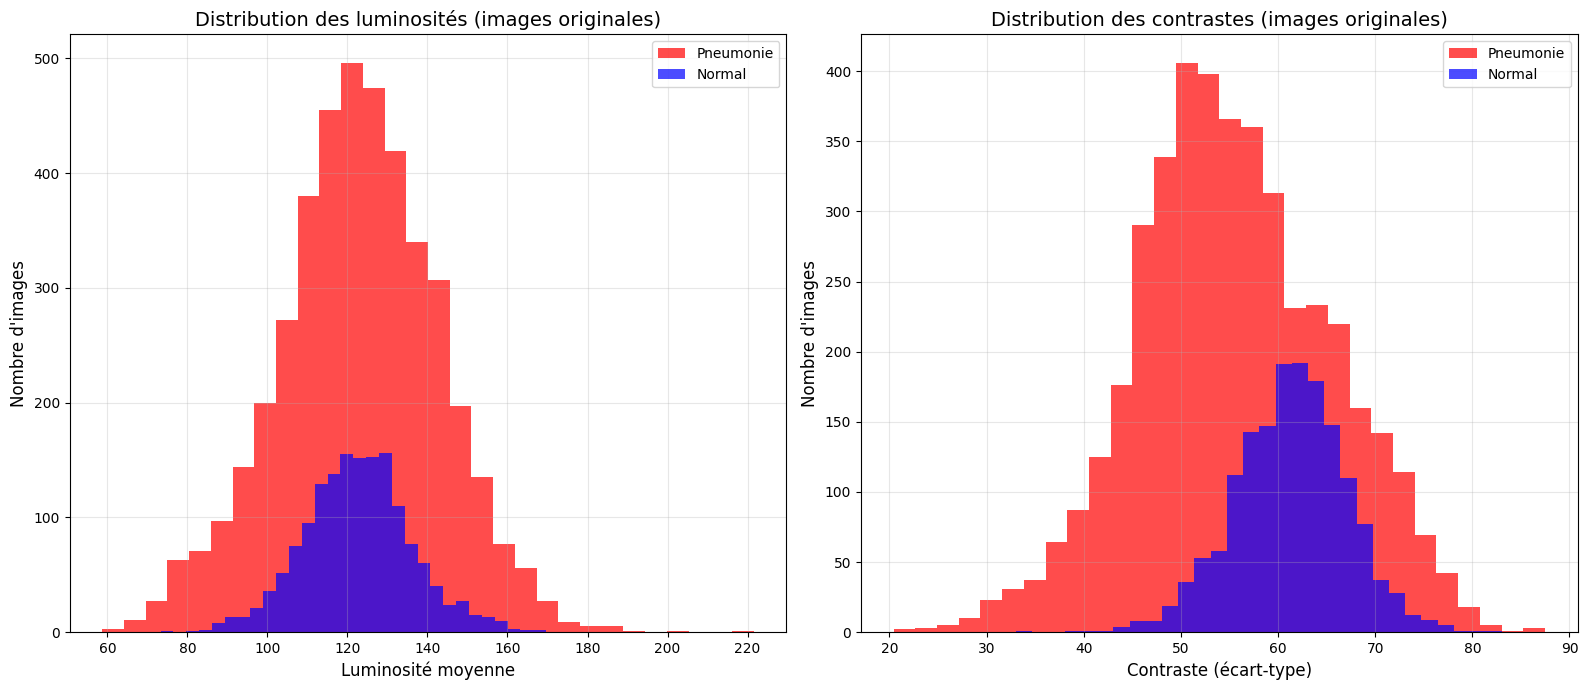

In [16]:

base_path = 'chest_Xray'
folders = ['train', 'test', 'val']

def analyze_image(img_path):
    try:
        img = Image.open(img_path)
        img_width, img_height = img.size
        img_mode = img.mode
        img_array = np.array(img)
        
        if 'train' in img_path:
            dataset = 'Train'
        elif 'test' in img_path:
            dataset = 'Test'
        else:
            dataset = 'Validation'
        
        return {
            'width': img_width,
            'height': img_height,
            'mode': img_mode,
            'mean_pixel': np.mean(img_array),
            'std_pixel': np.std(img_array),
            'class': 'Normal' if 'NORMAL' in img_path else 'Pneumonia',
            'dataset': dataset
        }
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None

all_files = []
for folder in folders:

    normal_path = os.path.join(base_path, folder, 'NORMAL')
    if os.path.exists(normal_path):
        normal_files = [os.path.join(normal_path, f) for f in os.listdir(normal_path) 
                    if f.endswith(('.jpeg', '.jpg', '.png'))]
        all_files.extend(normal_files)
    

    pneumonia_path = os.path.join(base_path, folder, 'PNEUMONIA')
    if os.path.exists(pneumonia_path):
        pneumonia_files = [os.path.join(pneumonia_path, f) for f in os.listdir(pneumonia_path) 
                      if f.endswith(('.jpeg', '.jpg', '.png'))]
        all_files.extend(pneumonia_files)

start_time = time.time()
print(f"Analyzing all {len(all_files)} images across train, test, and validation sets...")

results = []

for i, img_path in enumerate(all_files):
    if i % 100 == 0 and i > 0: 
        print(f"Processed {i}/{len(all_files)} images...")
    result = analyze_image(img_path)
    if result:
        results.append(result)

elapsed_time = time.time() - start_time
print(f"Analysis completed in {elapsed_time:.2f} seconds")

df = pd.DataFrame(results)
normal_df = df[df['class'] == 'Normal']
pneumonia_df = df[df['class'] == 'Pneumonia']

print(f"\n===== DATASET SIZE =====")
print(f"Total images: {len(df)}")
print(f"Normal images: {len(normal_df)}")
print(f"Pneumonia images: {len(pneumonia_df)}")

for dataset in ['Train', 'Test', 'Validation']:
    dataset_df = df[df['dataset'] == dataset]
    dataset_normal = dataset_df[dataset_df['class'] == 'Normal']
    dataset_pneumonia = dataset_df[dataset_df['class'] == 'Pneumonia']
    
    print(f"\n===== {dataset.upper()} SET ({len(dataset_df)} images) =====")
    print(f"Normal: {len(dataset_normal)} images")
    print(f"Pneumonia: {len(dataset_pneumonia)} images")
    if len(dataset_normal) > 0:
        ratio = len(dataset_pneumonia)/len(dataset_normal)
        print(f"Ratio: 1:{ratio:.2f}")

print("\n===== DIMENSIONS =====")
print(f"Average width (Normal): {normal_df['width'].mean():.1f}px")
print(f"Average width (Pneumonia): {pneumonia_df['width'].mean():.1f}px")
print(f"Average height (Normal): {normal_df['height'].mean():.1f}px")
print(f"Average height (Pneumonia): {pneumonia_df['height'].mean():.1f}px")

print("\n===== BRIGHTNESS =====")
print(f"Average brightness (Normal): {normal_df['mean_pixel'].mean():.2f}")
print(f"Average brightness (Pneumonia): {pneumonia_df['mean_pixel'].mean():.2f}")

print("\n===== CONTRAST =====")
print(f"Average contrast (Normal): {normal_df['std_pixel'].mean():.2f}")
print(f"Average contrast (Pneumonia): {pneumonia_df['std_pixel'].mean():.2f}")

print("\n===== VARIABILITY BETWEEN IMAGES =====")
print(f"Brightness variability (Normal): {normal_df['mean_pixel'].std():.2f}")
print(f"Brightness variability (Pneumonia): {pneumonia_df['mean_pixel'].std():.2f}")
print(f"Contrast variability (Normal): {normal_df['std_pixel'].std():.2f}")
print(f"Contrast variability (Pneumonia): {pneumonia_df['std_pixel'].std():.2f}")

print("\n===== IMAGE MODES =====")
print(df['mode'].value_counts())

print("\n===== SIZE VARIETY =====")
unique_sizes = len(df.groupby(['width', 'height']))
print(f"Number of different sizes: {unique_sizes}")
print(f"Min dimensions: {df['width'].min()}×{df['height'].min()}")
print(f"Max dimensions: {df['width'].max()}×{df['height'].max()}")


plt.figure(figsize=(16, 7))

# Distribution des luminosités
plt.subplot(1, 2, 1)
plt.hist(pneumonia_df['mean_pixel'], bins=30, alpha=0.7, color='red', label='Pneumonie')
plt.hist(normal_df['mean_pixel'], bins=30, alpha=0.7, color='blue', label='Normal')
plt.xlabel('Luminosité moyenne', fontsize=12)
plt.ylabel('Nombre d\'images', fontsize=12)
plt.title('Distribution des luminosités (images originales)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Distribution des contrastes
plt.subplot(1, 2, 2)
plt.hist(pneumonia_df['std_pixel'], bins=30, alpha=0.7, color='red', label='Pneumonie')
plt.hist(normal_df['std_pixel'], bins=30, alpha=0.7, color='blue', label='Normal')
plt.xlabel('Contraste (écart-type)', fontsize=12)
plt.ylabel('Nombre d\'images', fontsize=12)
plt.title('Distribution des contrastes (images originales)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Afficher la figure
plt.tight_layout()
plt.show()

# Analyse complète vs échantillon: ce qui change

En analysant les 5856 images au lieu des 100 initiales, on observe:


**Dimensions:**

Les images normales sont généralement plus grandes (1686×1379 px) que les images de pneumonie (1195×820 px)
La taille varie considérablement, allant de 384×127 à 2916×2713 pixels
La variété des dimensions est extrême (4803 tailles différentes pour 5856 images)

**Format:**

La majorité des images (95.2%) sont en niveaux de gris (mode "L")
283 images (4.8%) sont en couleur (mode "RGB")

**Luminosité:**

Les images de pneumonie sont très légèrement plus claires (122.84) que les normales (122.63)
La variabilité de luminosité est plus grande entre les images de pneumonie (19.89) qu'entre les images normales (13.54)

**Contraste:**

Les images normales présentent plus de contraste (61.27) que les pneumonies (55.41)
La variabilité de contraste est plus élevée entre les images de pneumonie (9.96) qu'entre les normales (5.80)

**Distribution des classes:**

Déséquilibre important: 4273 pneumonies (73%) vs 1583 normales (27%)
Ensemble d'entraînement: ratio de 1:2.89 (normal:pneumonie)
Ensemble de test: ratio de 1:1.67
Ensemble de validation: parfaitement équilibré (8:8) mais très petit

Train: 5216 images (89%)

Test: 624 images (10.7%)

Validation: 16 images (0.3%)